Informasi Pribadi
#MAY LIA KHOIRONISA (0182180120-98)

Proyek Akhir: Klasifikasi gambar
Submission Machine Learning 2021.
Kriteria:

1.   Val set(874) & Training set (1314) (V)
2.   Augmentasi gambar (V)
3.   Data generator(V)
4.   Sequential Model (V)
5.   Pelatihan model <30 mnt (V)
6.   Akurasi 85% (V)
7.   Prediksi gambar yang diunggah (V)




In [1]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-09 04:46:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  15.9MB/s    in 13s     

2021-07-09 04:46:57 (23.5 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [10]:
!pip install split-folders

In [13]:
import zipfile #impor modul zipfile buat baca file zip
import os #impor modul os buat akses folder data

local_zip='/tmp/rockpaperscissors.zip' #definisi file zip yang mau di ekstrak
zip_ref=zipfile.ZipFile(local_zip,'r') #ekstrak file zip
zip_ref.extractall('/tmp/') #nempatin file hasil ekstra zip
zip_ref.close() #hentikan fungsi zip.ref

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output=base_dir, ratio=(0.6,0.4))

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

Copying files: 2188 files [00:03, 612.30 files/s]


In [3]:
import os #impor modul os untuk akses folder data
folder_gunting=os.path.join('/tmp/rockpaperscissors/scissors') #definisi folder training untuk gunting
folder_kertas=os.path.join('/tmp/rockpaperscissors/paper')
folder_batu=os.path.join('/tmp/rockpaperscissors/rock')
total_images = len(os.listdir(folder_batu)) + len(os.listdir(folder_kertas)) + len(os.listdir(folder_gunting))

print("Gambar gunting sebanyak:",len(os.listdir(folder_gunting)))
print("Gambar kertas sebanyak:",len(os.listdir(folder_kertas)))
print("Gambar batu sebanyak:",len(os.listdir(folder_batu)))
print("Total Gambar:",total_images)

print("\n:::Cek isi file:::")
file_batu=os.listdir(folder_batu)
file_kertas=os.listdir(folder_kertas)
file_gunting=os.listdir(folder_gunting)
print("Batu:",file_batu[:3])
print("kertas:",file_kertas[:3])
print("gunting:",file_gunting[:3])

Gambar gunting sebanyak: 750
Gambar kertas sebanyak: 712
Gambar batu sebanyak: 726
Total Gambar: 2188

:::Cek isi file:::
Batu: ['7gcPqW9meL8zJHFF.png', 'hqD5rX5jXifrtMJO.png', 'Aa9hY8wo2ixaUNKH.png']
kertas: ['cOHWfHkyo8sqWnpW.png', 'dyHfn1GBYIj195b5.png', 'UHyVkisiFMmasl7b.png']
gunting: ['KSNET1XTWbrg5Rcz.png', 'sVmVaYH9SUDDI6y4.png', 'XNsF8hyn9RBUaFnw.png']


In [5]:
#image generator
import tensorflow as tf
import keras_preprocessing

from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [46]:
import random
import math
from shutil import copyfile

def split_generator(source, training, val, split_size, class_rps):
  class_listdir = os.listdir(source)
  val_size = math.floor(len(class_listdir) * split_size)

  counter1 = 0
  counter2 = 0

  for count, files in enumerate(class_listdir):
    if count < val_size:
      copyfile(os.path.join(source, files), os.path.join(val, files))
      #print("Copied file from " + os.path.join(source, files) + " to " + os.path.join(val, files))
      counter1 = counter1 + 1
    else:
      copyfile(os.path.join(source, files), os.path.join(training, files))
      #print("Copied file from " + os.path.join(source, files) + " to " + os.path.join(training, files))
      counter2 = counter2 + 1
    
  print('Total {} training images: {}'.format(class_rps, counter2))
  print('Total {} val images: {}'.format(class_rps, counter1))

split = 0.4
base_dir = ('/tmp/Split_RPS')
class_rps = ['rock', 'paper', 'scissors']
class_data = ['training', 'val']
try:
  os.mkdir(base_dir)
  for data in class_data:
    os.mkdir(os.path.join(base_dir, data))
    for classes in class_rps:
      os.mkdir(os.path.join(base_dir, data, classes))
except OSError:
  pass

folder_batu_val = ('/tmp/Split_RPS/validation/rock')
folder_kertas_val = ('/tmp/Split_RPS/validation/paper')
folder_gunting_val =('/tmp/Split_RPS/validation/scissors')

folder_batu_training = ('/tmp/Split_RPS/training/rock')
folder_kertas_training = ('/tmp/Split_RPS/training/paper')
folder_gunting_training = ('/tmp/Split_RPS/training/scissors')

split_generator(folder_batu, folder_batu_training, folder_batu_val, split, class_rps[0])
print("====================================")
split_generator(folder_kertas, folder_kertas_training,folder_kertas_val, split, class_rps[1])
print("====================================")
split_generator(folder_gunting, folder_gunting_training, folder_gunting_val, split, class_rps[2])

Total rock training images: 436
Total rock val images: 290
Total paper training images: 428
Total paper val images: 284
Total scissors training images: 450
Total scissors val images: 300


In [51]:
TRAINING_DIR = "/tmp/Split_RPS/training/" #Siapkan folder utama
#Image generator
training_datagen = ImageDataGenerator(
      rescale = 1./255, #normalisasi data
	    rotation_range=40,  #skenario rotasi gambar 40 derajat
      width_shift_range=0.2,  #pelebaran gambar 0.2x dari ukuran asli
      height_shift_range=0.2, #peninggian gambar 0.2x dari ukuran asli
      shear_range=0.2,  #pemangkasan gambar 0.2x dari ukuran asli
      zoom_range=0.2, #zoom gambar 0.2x
      horizontal_flip=True, #putar balik secara horizontal
      fill_mode='nearest')  #isi piksel yg kosongg dengan pixel terdekat

VALIDATION_DIR = "/tmp/Split_RPS/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=73
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=46
)
#Membentuk model sequential
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # Konvolusi pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvolusi kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvolusi ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvolusi keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Layer input untuk deep learning neural network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden layer pertama dengan 512 neuron
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary() #menampilkan hasil summary model

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, steps_per_epoch=18, validation_data = validation_generator, verbose = 1, validation_steps=19)

model.save("rps.h5")

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_____________________________________

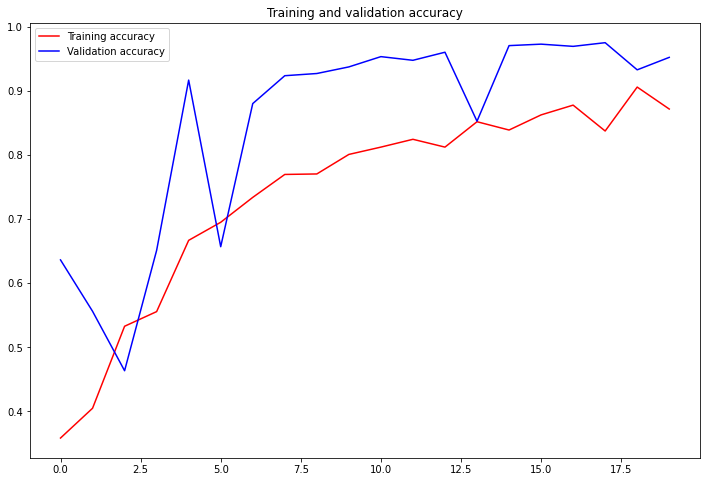

In [52]:
import matplotlib.pyplot as plt

accur = history.history['accuracy']
val_accur = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accur))

plt.figure(figsize=(12,8))
plt.plot(epochs, accur, 'r', label='Training accuracy')
plt.plot(epochs, val_accur, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [57]:
print(train_generator.class_indices)



{'paper': 0, 'rock': 1, 'scissors': 2}


In [58]:
images = np.vstack([x])
model.predict(images, batch_size=10)

array([[1.000000e+00, 0.000000e+00, 6.106232e-32]], dtype=float32)

In [59]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()

with open("modelImageCNN.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("modelImageCNN.h5")

Saving WhatsApp Image 2021-07-09 at 14.28.00.jpeg to WhatsApp Image 2021-07-09 at 14.28.00 (2).jpeg
WhatsApp Image 2021-07-09 at 14.28.00.jpeg
KERTAS


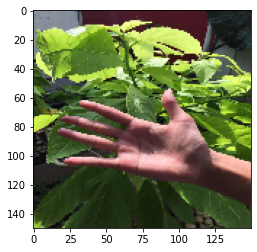

In [62]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# mengupload file, trus ditampung disini
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  # memilih file gambar secara interaktif
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # resize gambar dan mengubahnya menjadi larik numpy
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  outclass = np.argmax(classes)

  print(fn)
  if outclass == 0:
    print('KERTAS')
  elif outclass == 1:
    print('BATU')
  else:
    print('GUNTING')